In [1]:
from intdielec.io.cp2k import Cp2kOutput
from intdielec.utils.unit import *

In [2]:
output = Cp2kOutput("output.out")

# total energy

In [13]:
data = output.grep_text_2("Total energy: ")
data = data.replace('\n', ' ')
data = data.split(' ')
e_1 = float(data[-1]) * AU_TO_EV

data = output.grep_text_2("Total FORCE_EVAL")
data = data.replace('\n', ' ')
data = data.split(' ')
e_2 = float(data[-1]) * AU_TO_EV

In [14]:
print("Total energy [eV]: ", e_1)
print("Total FORCE_EVAL Energy [eV]: ", e_2)
print("Energy difference [eV]: ", e_1 - e_2)

Total energy [eV]:  -71615.07862955485
Total FORCE_EVAL Energy [eV]:  -71615.07876371265
Energy difference [eV]:  0.000134157802676782


# atomic charge

In [42]:
import re
import numpy as np

In [26]:
start_pattern = "Hirshfeld Charges"
nlines = 104

In [43]:
def grep_texts_by_nlines(start_pattern, nlines):
    start_pattern = re.compile(start_pattern)

    data_lines = []
    nframe = 0
    for ii, line in enumerate(output.content):
        line = line.strip('\n')
        if start_pattern.search(line) is not None:
            # print(output.content[ii: ii+nlines])
            data_lines.append(output.content[ii: ii+nlines])
            nframe += 1
            continue  
    # nframe = len(data_lines)
    return nframe, data_lines

In [44]:
nframe, data_lines = grep_texts_by_nlines(start_pattern, nlines)
data_lines = np.reshape(data_lines, (nframe, -1))

data_list = []
for line in data_lines[:, 3:].reshape(-1):
    line_list = line.split()
    data_list.append(float(line_list[-1]))

In [45]:
np.reshape(data_list, (nframe, -1))

array([[-0.022, -0.009, -0.003, -0.015,  0.005, -0.022, -0.01 , -0.006,
         0.003, -0.037, -0.01 , -0.018, -0.015, -0.022, -0.017, -0.018,
         0.006,  0.021,  0.014,  0.002,  0.004,  0.014,  0.004,  0.019,
         0.012,  0.012,  0.017,  0.007,  0.019,  0.001,  0.011,  0.005,
         0.002,  0.014,  0.002,  0.002,  0.005,  0.006, -0.006,  0.01 ,
        -0.008,  0.002,  0.01 ,  0.003,  0.008,  0.007, -0.001,  0.   ,
         0.002, -0.004,  0.002,  0.004,  0.022, -0.003, -0.004,  0.02 ,
        -0.002,  0.008, -0.008,  0.004, -0.009, -0.003, -0.016,  0.003,
         0.004, -0.   ,  0.012,  0.026,  0.019, -0.016,  0.014,  0.022,
         0.014,  0.012,  0.01 , -0.006,  0.018,  0.008,  0.014,  0.012,
        -0.045, -0.027, -0.045, -0.019, -0.043, -0.124, -0.051, -0.025,
        -0.019, -0.17 , -0.299, -0.055, -0.017, -0.116, -0.066, -0.048,
        -0.418,  0.589,  0.589,  0.178,  0.043]])

In [3]:
output.m_charge

array([[-0.071935, -0.04795 , -0.035286, -0.035154, -0.061241, -0.076684,
        -0.054443, -0.019393, -0.064902, -0.068258, -0.059851, -0.04202 ,
        -0.042392, -0.082345, -0.067676, -0.05936 ,  0.035538,  0.048059,
         0.030349,  0.018874,  0.020695,  0.019256,  0.046431,  0.070963,
         0.017696,  0.017247,  0.02431 ,  0.028745,  0.052605,  0.009866,
        -0.000464,  0.007012,  0.042726,  0.023575, -0.008986,  0.034599,
         0.035049,  0.023776,  0.019025,  0.056264,  0.015492,  0.028285,
         0.050982,  0.017263,  0.030138,  0.040653,  0.006104,  0.014468,
         0.008223,  0.022628,  0.018658,  0.052474,  0.084505,  0.003598,
         0.016048,  0.076552,  0.033172,  0.021696,  0.015281,  0.023471,
        -0.00774 ,  0.020991, -0.011073,  0.022311,  0.007911,  0.00237 ,
         0.04776 ,  0.079112,  0.048034, -0.057036,  0.033172,  0.061649,
         0.040626,  0.036561,  0.014355, -0.02667 ,  0.058664,  0.025001,
         0.035218,  0.012702, -0.07822

In [4]:
output.h_charge

array([[-0.022, -0.009, -0.003, -0.015,  0.005, -0.022, -0.01 , -0.006,
         0.003, -0.037, -0.01 , -0.018, -0.015, -0.022, -0.017, -0.018,
         0.006,  0.021,  0.014,  0.002,  0.004,  0.014,  0.004,  0.019,
         0.012,  0.012,  0.017,  0.007,  0.019,  0.001,  0.011,  0.005,
         0.002,  0.014,  0.002,  0.002,  0.005,  0.006, -0.006,  0.01 ,
        -0.008,  0.002,  0.01 ,  0.003,  0.008,  0.007, -0.001,  0.   ,
         0.002, -0.004,  0.002,  0.004,  0.022, -0.003, -0.004,  0.02 ,
        -0.002,  0.008, -0.008,  0.004, -0.009, -0.003, -0.016,  0.003,
         0.004, -0.   ,  0.012,  0.026,  0.019, -0.016,  0.014,  0.022,
         0.014,  0.012,  0.01 , -0.006,  0.018,  0.008,  0.014,  0.012,
        -0.045, -0.027, -0.045, -0.019, -0.043, -0.124, -0.051, -0.025,
        -0.019, -0.17 , -0.299, -0.055, -0.017, -0.116, -0.066, -0.048,
        -0.418,  0.589,  0.589,  0.178,  0.043]])

# surface dipole moment

In [6]:
import re
import numpy as np

In [25]:
pattern = 'Total dipole moment perpendicular to'
pattern = re.compile(pattern)

flag = False
data_lines = []
nframe = 0
for line in output.content:
    line = line.strip('\n')
    if pattern.search(line) is not None:
        flag = True
        nframe += 1
        continue
    if flag:
        data_lines.append(line)
        flag = False
data_lines = np.reshape(data_lines, (nframe))
data_list = []
for line in data_lines:
    line_list = line.split()
    data_list.append(float(line_list[-1]))

In [26]:
data_list

[-1.5878220042]

In [3]:
output.surf_dipole_moment

array([-1.587822])

In [4]:
from intdielec.io.cp2k import Cp2kHartreeCube

In [5]:
cube = Cp2kHartreeCube("cp2k-v_hartree-1_0.cube")

In [6]:
output = cube.get_ave_cube()

In [7]:
import matplotlib.pyplot as plt

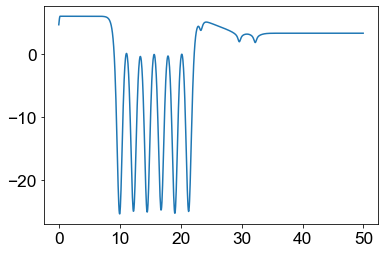

In [8]:
plt.plot(output[0], output[1])


plt.show()

In [15]:
cube.set_vac_region(vac_region=[40., 5.])
cube.set_cross_area(11.087 * 9.602)

In [16]:
cube.dipole

-0.7938834322360663

In [17]:
cube.potdrop

1.349405926565776

In [18]:
cube.ave_cube_data[-10]

3.3251638920062856

In [19]:
cube.ave_cube_data[10]

6.024010452583365

In [25]:
deltaV = 6.024010452583365 - 3.3251638920062856
print(cube.dipole * deltaV / cube.potdrop)

-1.5877872835805986


In [21]:
cube.atoms

Atoms(symbols='H2Na2OPt96', pbc=False, cell=[11.087435218011082, 9.601991395427113, 49.99988025151194])

In [24]:
cube.cube_data.shape

(216, 189, 960)

In [ ]:
# 11.087
11.087435218011082